### Imports

In [1]:
import pandas as pd
import numpy as np
import sys
import os
import math
import matplotlib.pyplot as plt
from terminaltables import AsciiTable

from sklearn.preprocessing import normalize

cmap = plt.get_cmap('viridis')

PATH_TO_DATA = '../data'

### Load dataset

In [2]:
assert os.path.exists('%s/dataset' % PATH_TO_DATA), \
    "Please execute the notebook 'build_feature_set.ipynb' before running this notebook."

dataset = pd.read_pickle('%s/dataset' % PATH_TO_DATA)

### Display correlation matrix

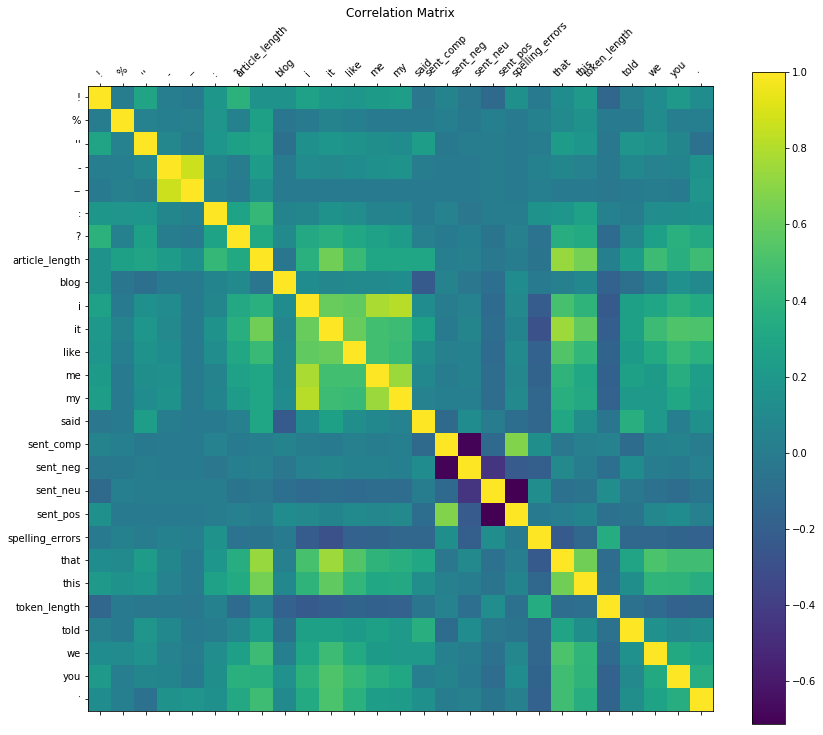

Blog correlation:
+------+-----------------+------------------+
| Num. | Feature         | Blog Correlation |
+------+-----------------+------------------+
| 0    | !               | 0.16413          |
| 1    | %               | -0.04112         |
| 2    | ''              | -0.08196         |
| 3    | -               | -0.01235         |
| 4    | --              | -0.00966         |
| 5    | :               | 0.06216          |
| 6    | ?               | 0.09873          |
| 7    | article_length  | -0.03917         |
| 8    | blog            | 1.0              |
| 9    | i               | 0.122            |
| 10   | it              | 0.07716          |
| 11   | like            | 0.0972           |
| 12   | me              | 0.10276          |
| 13   | my              | 0.12266          |
| 14   | said            | -0.22787         |
| 15   | sent_comp       | 0.05347          |
| 16   | sent_neg        | -0.03107         |
| 17   | sent_neu        | -0.08971         |
| 18   | sent_po

In [3]:
blog_i = list(dataset.columns).index("blog")

# Normalize the data
dataset_norm = (dataset - dataset.mean()) / (dataset.max() - dataset.min())

correlation_matrix = dataset_norm.corr().values.round(5)

# Plot the correlation matrix
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset_norm.corr(), cmap=cmap, interpolation='nearest')

# Add title to matrix plot
ax.set_title("Correlation Matrix")
ttl = ax.title
ttl.set_position([.5, 1.1])

# Add feature names to axises
plt.xticks(range(dataset_norm.shape[1]), dataset_norm.columns, rotation=45)
plt.yticks(range(dataset_norm.shape[1]), dataset_norm.columns)

# Add color bar to the right of the matrix
fig.colorbar(cax)
plt.show()
plt.close()

# Extract the blog feature correlations
target_corr = correlation_matrix[:, blog_i]

print("Blog correlation:")
# Show feature table with correlations to blog articles
table_data = [["Num.", "Feature", "Blog Correlation"]]
for i, col in enumerate(dataset.columns):
    table_data.append([i, col, target_corr[i]])
print (AsciiTable(table_data).table)
print ("")


# Extract the blog feature correlations
target_corr_sorted = sorted(correlation_matrix[:, blog_i], key=abs, reverse=True)

print ("Ordered by highest absolute correlalation:")
# Show feature table with correlations to blog articles
table_data = [["Num.", "Feature", "Blog Correlation"]]
for corr in target_corr_sorted:
    i = np.argmax(target_corr == corr)
    col = dataset.columns[i]
    table_data.append([i, col, corr])
print (AsciiTable(table_data).table)
print ("")



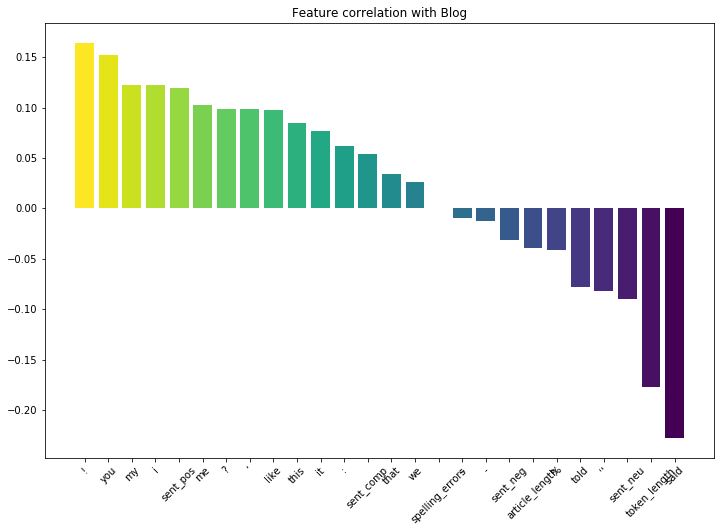

In [4]:
# Find the features with highest blog correlation
target_highest = np.argsort(target_corr)[::-1]

colors = [cmap(i) for i in np.linspace(0, 1, len(target_highest)-1)][::-1]

x_labels = [dataset.columns[i] for i in target_highest]

plt.figure(figsize=(12, 8))
plt.title("Feature correlation with Blog")
plt.bar(range(len(target_highest)-1), target_corr[target_highest][1:], color=colors)
plt.xticks(range(len(dataset.columns)-1), x_labels[1:], rotation=45)
plt.show()
plt.close()

### Compare feature values between distributions

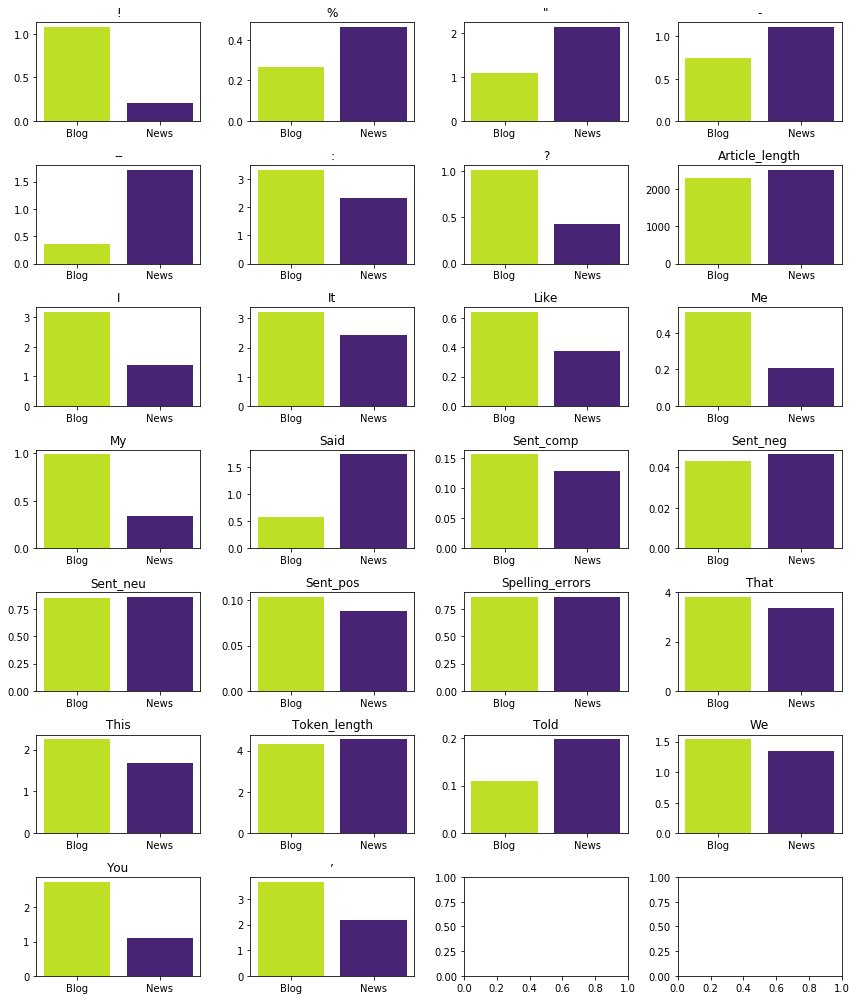

In [5]:

feature_names = [col for col in dataset.columns if col != "blog"]

# Extract news and blog articles respectively
news_articles = dataset[dataset['blog'] == 0][feature_names]
blog_articles = dataset[dataset['blog'] == 1][feature_names]

# Get mean values for each feature of each media type
means = list(zip(news_articles.mean(axis=0), blog_articles.mean(axis=0)))
    
colors = [cmap(0.1), cmap(0.9)]

# Plot grid
n_cols = 4
n_rows = math.ceil(len(feature_names)/n_cols)

fw, fh = n_cols*3, n_rows*2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(fw, fh))
fig.tight_layout()
for i in range(len(feature_names)):
    subplot = plt.subplot(n_rows, n_cols, i+1)
    subplot.set_title(feature_names[i].capitalize())
    subplot.bar(("News", "Blog"), means[i], color=colors) 
plt.tight_layout()
plt.show()
plt.close()
